In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
wine = pd.read_csv('winequality-red.csv' , delimiter=';')
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

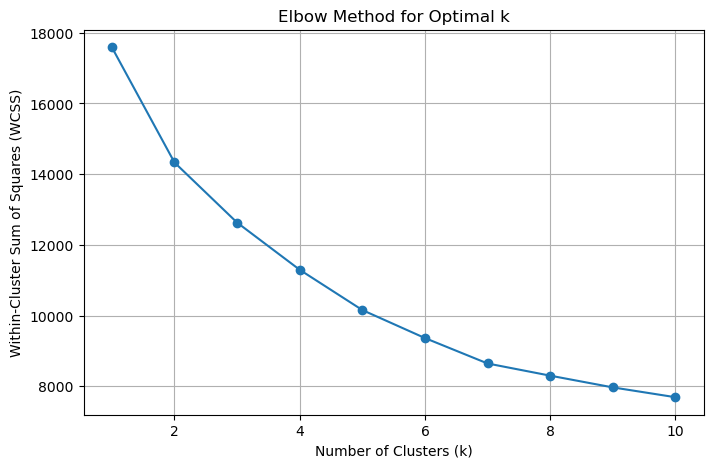

In [3]:
features = wine.drop('quality', axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters (optional)
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

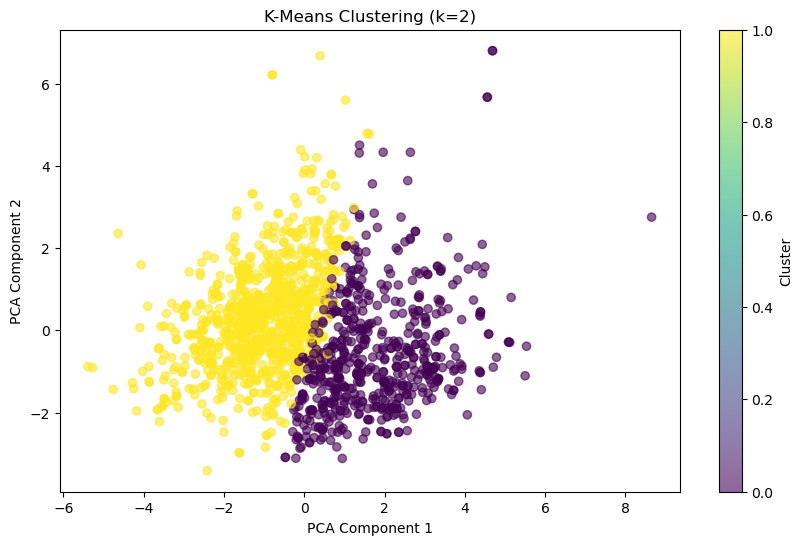

In [4]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
wine['Cluster'] = kmeans.fit_predict(features_scaled)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=wine['Cluster'], cmap='viridis', alpha=0.6)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

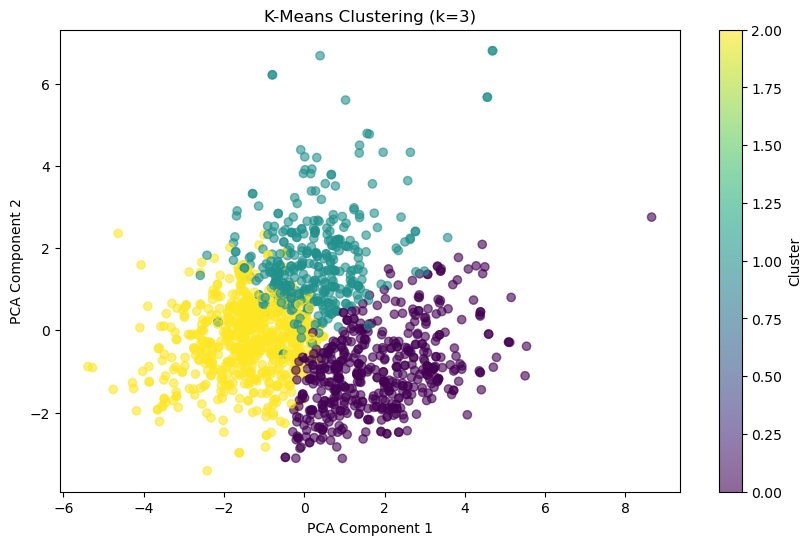

In [5]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
wine['Cluster'] = kmeans.fit_predict(features_scaled)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=wine['Cluster'], cmap='viridis', alpha=0.6)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

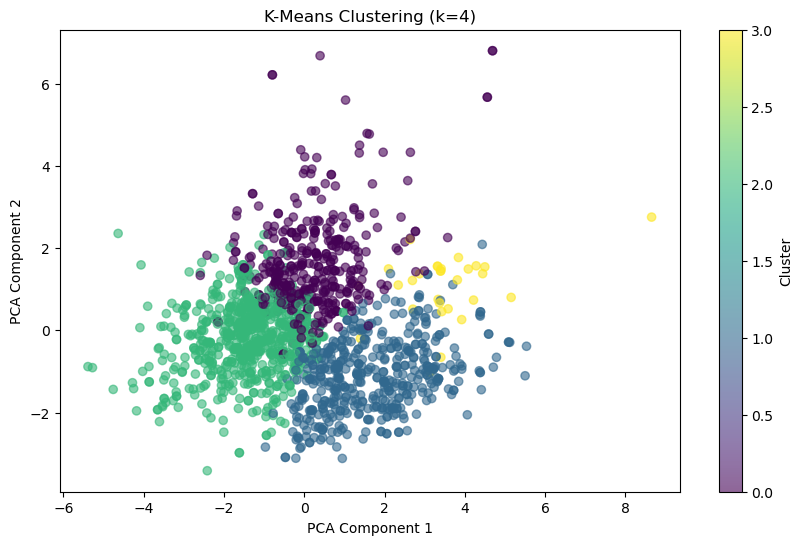

In [6]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
wine['Cluster'] = kmeans.fit_predict(features_scaled)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=wine['Cluster'], cmap='viridis', alpha=0.6)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [7]:
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df_binned = discretizer.fit_transform(features)
df_binned = pd.DataFrame(df_binned, columns=features.columns)

# Convert binned values to categorical labels
for col in df_binned.columns:
    df_binned[col] = pd.cut(features[col], bins=3, labels=["Low", "Medium", "High"])

# Step 3: One-Hot Encoding
df_onehot = pd.get_dummies(df_binned)

# Step 4: Apply Apriori with Different Support and Confidence Thresholds
# Let's try with support thresholds of 0.2, 0.3, and 0.4
supports = [0.2, 0.3, 0.4]
confidence_thresholds = [0.5, 0.6, 0.7]

for support in supports:
    print(f"\n--- Apriori with Support {support} ---")
    frequent_itemsets = apriori(df_onehot, min_support=support, use_colnames=True)
    for confidence in confidence_thresholds:
        print(f"\nRules with Confidence {confidence}")
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


--- Apriori with Support 0.2 ---

Rules with Confidence 0.5
                                             antecedents  \
0                                 (volatile acidity_Low)   
1                                    (fixed acidity_Low)   
2                              (volatile acidity_Medium)   
3                                    (fixed acidity_Low)   
4                                      (citric acid_Low)   
...                                                  ...   
59590  (alcohol_Low, fixed acidity_Low, residual suga...   
59591   (alcohol_Low, density_Medium, fixed acidity_Low)   
59592  (alcohol_Low, citric acid_Low, total sulfur di...   
59593     (density_Medium, alcohol_Low, citric acid_Low)   
59594                   (alcohol_Low, fixed acidity_Low)   

                                             consequents   support  \
0                                    (fixed acidity_Low)  0.373358   
1                                 (volatile acidity_Low)  0.373358   
2       

Explained Variance Ratio: [0.28173931 0.1750827 ]
Total Explained Variance: 0.4568220118429416


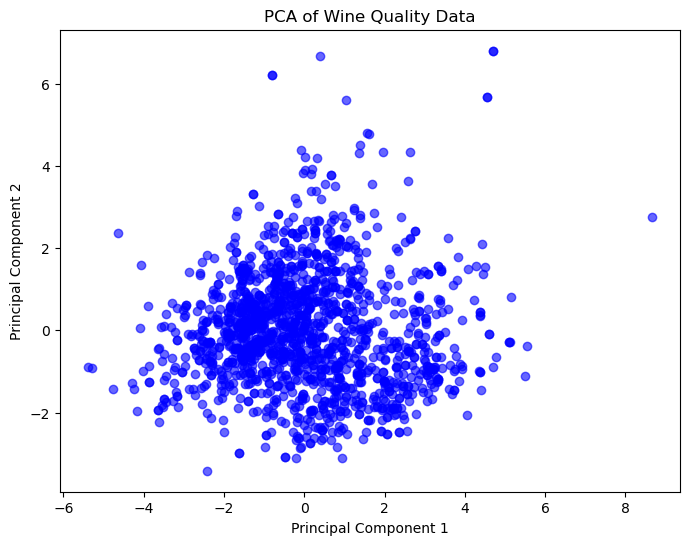

In [8]:
#Do not include this in ppt
#Do not include this in ppt
# Step 3: Apply PCA
pca = PCA(n_components=2)  # Specify the number of components
principal_components = pca.fit_transform(features_scaled)

# Step 4: Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 5: Explained Variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))

# Step 6: Visualize the PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='blue', alpha=0.6)
plt.title('PCA of Wine Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Correlation Coefficients:
 [[ 1.         -0.25613089  0.67170343  0.11477672  0.09370519 -0.15379419
  -0.11318144  0.66804729 -0.68297819  0.18300566 -0.06166827]
 [-0.25613089  1.         -0.55249568  0.00191788  0.06129777 -0.01050383
   0.07647     0.02202623  0.23493729 -0.26098669 -0.20228803]
 [ 0.67170343 -0.55249568  1.          0.14357716  0.20382291 -0.06097813
   0.03553302  0.36494718 -0.54190414  0.31277004  0.10990325]
 [ 0.11477672  0.00191788  0.14357716  1.          0.05560954  0.187049
   0.20302788  0.35528337 -0.08565242  0.00552712  0.04207544]
 [ 0.09370519  0.06129777  0.20382291  0.05560954  1.          0.00556215
   0.04740047  0.20063233 -0.26502613  0.37126048 -0.22114054]
 [-0.15379419 -0.01050383 -0.06097813  0.187049    0.00556215  1.
   0.66766645 -0.02194583  0.0703775   0.05165757 -0.06940835]
 [-0.11318144  0.07647     0.03553302  0.20302788  0.04740047  0.66766645
   1.          0.07126948 -0.06649456  0.04294684 -0.20565394]
 [ 0.66804729  0.0220262

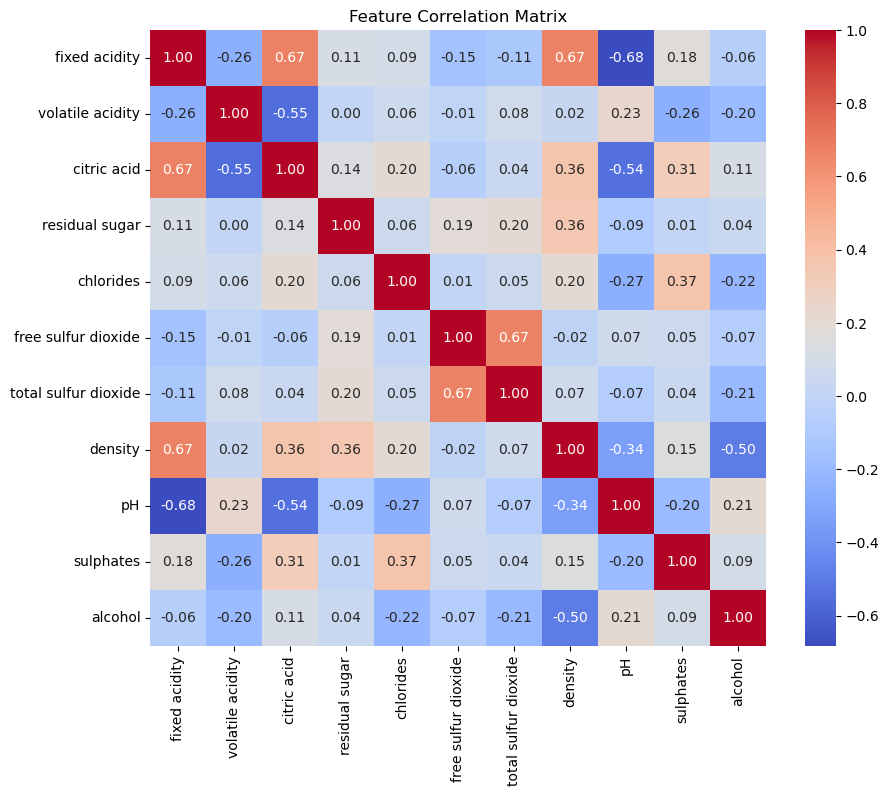

In [9]:
#Do not include this in ppt
#Do not include this in ppt
# Step 2: Compute Correlation Matrix
correlation_matrix = np.corrcoef(features_scaled, rowvar=False)
columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]
# Step 3: Display Correlation Matrix
print("Correlation Coefficients:\n", correlation_matrix)

# Step 4: Visualize Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f",xticklabels=columns, yticklabels=columns)
plt.title("Feature Correlation Matrix")
plt.show()